In [6]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

maxFrecuency = 2000
minFrecuency = 20
frequencyDifference = ctrl.Antecedent(
    np.arange(0, maxFrecuency - minFrecuency, 1),
    "frequency",
)

# https://www.harpsatsang.com/harp_design/data/stringcalculator.html
maxLength = 1.2
minLength = 0.08
stringLength = ctrl.Antecedent(
    np.arange(minLength, maxLength, 0.01), "stringLength"
)

turn = ctrl.Consequent(np.arange(0, 1.1, 0.01), "turn")

frequencyDifference["very_close"] = fuzz.trapmf(
            frequencyDifference.universe, [0, 0, 50, 100]
)
frequencyDifference["close"] = fuzz.trapmf(
    frequencyDifference.universe, [50, 100, 150, 250]
)
frequencyDifference["medium"] = fuzz.trapmf(
    frequencyDifference.universe, [150, 350, 500, 1000]
)
frequencyDifference["far"] = fuzz.trapmf(
    frequencyDifference.universe, [500, 1000, 2000, 2000]
)

stringLength["small"] = fuzz.trimf(stringLength.universe, [0.08, 0.08, 0.6])
stringLength["medium"] = fuzz.trimf(stringLength.universe, [0.08, 0.6, 1.2])
stringLength["long"] = fuzz.trimf(stringLength.universe, [0.6, 1.2, 1.2])


#subirles algo al very_little y al very_close y crear un very_very
turn["very_little"] = fuzz.trapmf(turn.universe, [0, 0, 0.02, 0.1])
turn["little"] = fuzz.trapmf(turn.universe, [0.02, 0.1, 0.25, 0.4])
turn["medium"] = fuzz.trapmf(turn.universe, [0.25, 0.4, 0.6, 0.8])
turn["large"] = fuzz.trapmf(turn.universe, [0.6, 0.8, 1, 1])


# Reglas difusas
rule1 = ctrl.Rule(
    frequencyDifference["very_close"] & stringLength["small"],
    turn["very_little"]
)
rule2 = ctrl.Rule(
    frequencyDifference["very_close"] & stringLength["medium"],
    turn["very_little"]
)
rule3 = ctrl.Rule(
    frequencyDifference["very_close"] & stringLength["long"],
    turn["little"]
)
rule4 = ctrl.Rule(
    frequencyDifference["close"] & stringLength["small"],
    turn["very_little"]
)
rule5 = ctrl.Rule(
    frequencyDifference["close"] & stringLength["medium"],
    turn["little"]
)
rule6 = ctrl.Rule(
    frequencyDifference["close"] & stringLength["long"],
    turn["medium"]
)
rule7 = ctrl.Rule(
    frequencyDifference["medium"] & stringLength["small"],
    turn["medium"]
)
rule8 = ctrl.Rule(
    frequencyDifference["medium"] & stringLength["medium"],
    turn["medium"]
)
rule9 = ctrl.Rule(
    frequencyDifference["medium"] & stringLength["long"],
    turn["large"]
)
rule10 = ctrl.Rule(
    frequencyDifference["far"] & stringLength["small"],
    turn["large"]
)
rule11 = ctrl.Rule(
    frequencyDifference["far"] & stringLength["medium"],
    turn["large"]
)
rule12 = ctrl.Rule(
    frequencyDifference["far"] & stringLength["long"],
    turn["large"]
)

turn_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
        rule10, rule11, rule12]
)
turner = ctrl.ControlSystemSimulation(turn_ctrl)


c:\Users\Sergio\Escritorio\RAin_proyect\RAIN-StringTuner\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


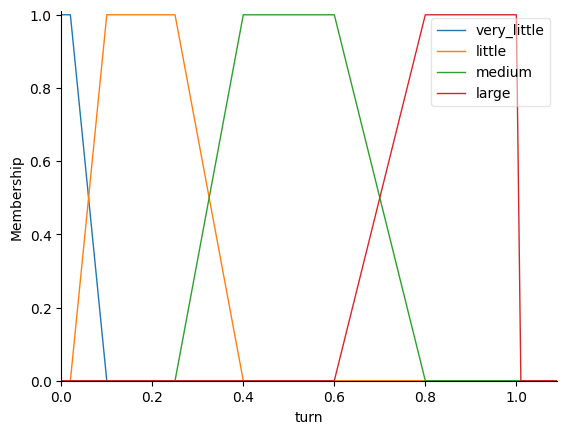

In [2]:
turn.view()

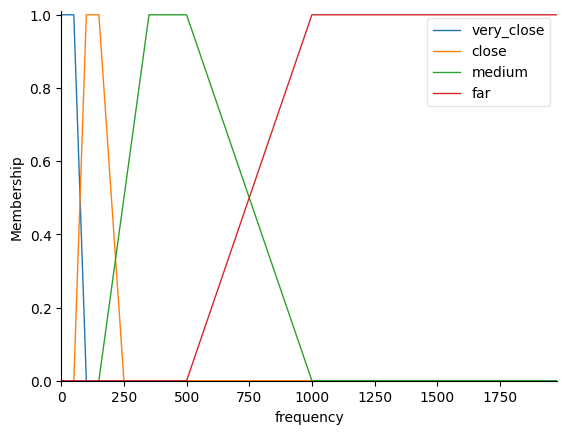

In [7]:
frequencyDifference.view()

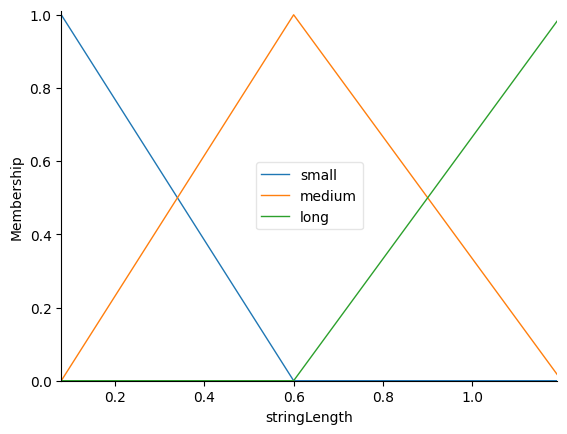

In [8]:
stringLength.view()